In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm import tqdm
from tqdm.notebook import tqdm_notebook


In [2]:
import nltk
from nltk.corpus import stopwords

In [3]:
train = pd.read_csv('sexismdataset.csv')

In [4]:
train.shape

(14881, 5)

In [5]:
train.head()

,index,id,Text,Annotation,oh_label
0,5.35198627292254E+017,5.35198627292254E+017,RT @BeepsS: @senna1 @BeepsS: I'm not sexist bu...,sexism,1.0
1,5.75984924030714E+017,5.75984924030714E+017,There's some very hate able teams this year #MKR,none,0.0
2,5.7233536016588E+017,5.7233536016588E+017,"RT @The_Eccles: ""Everyone underestimated us"" \...",none,0.0
3,5.72337925708374E+017,5.72337925708374E+017,RT @NOTLukeDarcy: did @Channel7 or #MKR actual...,none,0.0
4,4.43033024528011E+017,4.43033024528011E+017,"No, you don't. @Shut_Up_Jeff: I thought of a r...",sexism,1.0


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14881 entries, 0 to 14880
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       14881 non-null  object 
 1   id          14880 non-null  object 
 2   Text        14880 non-null  object 
 3   Annotation  14878 non-null  object 
 4   oh_label    14878 non-null  float64
dtypes: float64(1), object(4)
memory usage: 581.4+ KB


In [7]:
train.isnull().sum()

index         0
id            1
Text          1
Annotation    3
oh_label      3
dtype: int64

In [8]:
train['oh_label'].value_counts()

0.0    11501
1.0     3377
Name: oh_label, dtype: int64

In [9]:
train['oh_label'].nunique()

2

In [10]:
train.dropna()

,index,id,Text,Annotation,oh_label
0,5.35198627292254E+017,5.35198627292254E+017,RT @BeepsS: @senna1 @BeepsS: I'm not sexist bu...,sexism,1.0
1,5.75984924030714E+017,5.75984924030714E+017,There's some very hate able teams this year #MKR,none,0.0
2,5.7233536016588E+017,5.7233536016588E+017,"RT @The_Eccles: ""Everyone underestimated us"" \...",none,0.0
3,5.72337925708374E+017,5.72337925708374E+017,RT @NOTLukeDarcy: did @Channel7 or #MKR actual...,none,0.0
4,4.43033024528011E+017,4.43033024528011E+017,"No, you don't. @Shut_Up_Jeff: I thought of a r...",sexism,1.0
...,...,...,...,...,...
14876,5.76422824501379E+017,5.76422824501379E+017,@RaikonL @finaleve @mja333 WHY DO YOU HATE FRE...,none,0.0
14877,4.64045547473498E+017,4.64045547473498E+017,It is unconscionable that our regulatory bodie...,none,0.0
14878,5.54705698508919E+017,5.54705698508919E+017,@Dartanveerahmad @Janx53 @geehall1 We want ISI...,none,0.0
14879,5.7560079584598E+017,5.7560079584598E+017,#mkr Unbelievable how low Kat &amp; Andre wil...,none,0.0


In [11]:
train['oh_label'].dtype

dtype('float64')

In [12]:
train.isnull().sum()

index         0
id            1
Text          1
Annotation    3
oh_label      3
dtype: int64

In [13]:
train.dropna(inplace= True)

In [14]:
train.isnull().sum()

index         0
id            0
Text          0
Annotation    0
oh_label      0
dtype: int64

In [15]:
train

,index,id,Text,Annotation,oh_label
0,5.35198627292254E+017,5.35198627292254E+017,RT @BeepsS: @senna1 @BeepsS: I'm not sexist bu...,sexism,1.0
1,5.75984924030714E+017,5.75984924030714E+017,There's some very hate able teams this year #MKR,none,0.0
2,5.7233536016588E+017,5.7233536016588E+017,"RT @The_Eccles: ""Everyone underestimated us"" \...",none,0.0
3,5.72337925708374E+017,5.72337925708374E+017,RT @NOTLukeDarcy: did @Channel7 or #MKR actual...,none,0.0
4,4.43033024528011E+017,4.43033024528011E+017,"No, you don't. @Shut_Up_Jeff: I thought of a r...",sexism,1.0
...,...,...,...,...,...
14876,5.76422824501379E+017,5.76422824501379E+017,@RaikonL @finaleve @mja333 WHY DO YOU HATE FRE...,none,0.0
14877,4.64045547473498E+017,4.64045547473498E+017,It is unconscionable that our regulatory bodie...,none,0.0
14878,5.54705698508919E+017,5.54705698508919E+017,@Dartanveerahmad @Janx53 @geehall1 We want ISI...,none,0.0
14879,5.7560079584598E+017,5.7560079584598E+017,#mkr Unbelievable how low Kat &amp; Andre wil...,none,0.0


In [16]:
train['oh_label']=train['oh_label'].astype(int)

In [17]:
train

,index,id,Text,Annotation,oh_label
0,5.35198627292254E+017,5.35198627292254E+017,RT @BeepsS: @senna1 @BeepsS: I'm not sexist bu...,sexism,1
1,5.75984924030714E+017,5.75984924030714E+017,There's some very hate able teams this year #MKR,none,0
2,5.7233536016588E+017,5.7233536016588E+017,"RT @The_Eccles: ""Everyone underestimated us"" \...",none,0
3,5.72337925708374E+017,5.72337925708374E+017,RT @NOTLukeDarcy: did @Channel7 or #MKR actual...,none,0
4,4.43033024528011E+017,4.43033024528011E+017,"No, you don't. @Shut_Up_Jeff: I thought of a r...",sexism,1
...,...,...,...,...,...
14876,5.76422824501379E+017,5.76422824501379E+017,@RaikonL @finaleve @mja333 WHY DO YOU HATE FRE...,none,0
14877,4.64045547473498E+017,4.64045547473498E+017,It is unconscionable that our regulatory bodie...,none,0
14878,5.54705698508919E+017,5.54705698508919E+017,@Dartanveerahmad @Janx53 @geehall1 We want ISI...,none,0
14879,5.7560079584598E+017,5.7560079584598E+017,#mkr Unbelievable how low Kat &amp; Andre wil...,none,0


In [18]:
train.drop(['index','id','Annotation'],axis=1)

,Text,oh_label
0,RT @BeepsS: @senna1 @BeepsS: I'm not sexist bu...,1
1,There's some very hate able teams this year #MKR,0
2,"RT @The_Eccles: ""Everyone underestimated us"" \...",0
3,RT @NOTLukeDarcy: did @Channel7 or #MKR actual...,0
4,"No, you don't. @Shut_Up_Jeff: I thought of a r...",1
...,...,...
14876,@RaikonL @finaleve @mja333 WHY DO YOU HATE FRE...,0
14877,It is unconscionable that our regulatory bodie...,0
14878,@Dartanveerahmad @Janx53 @geehall1 We want ISI...,0
14879,#mkr Unbelievable how low Kat &amp; Andre wil...,0


In [19]:
train[train.duplicated()]

,index,id,Text,Annotation,oh_label


In [20]:
train

,index,id,Text,Annotation,oh_label
0,5.35198627292254E+017,5.35198627292254E+017,RT @BeepsS: @senna1 @BeepsS: I'm not sexist bu...,sexism,1
1,5.75984924030714E+017,5.75984924030714E+017,There's some very hate able teams this year #MKR,none,0
2,5.7233536016588E+017,5.7233536016588E+017,"RT @The_Eccles: ""Everyone underestimated us"" \...",none,0
3,5.72337925708374E+017,5.72337925708374E+017,RT @NOTLukeDarcy: did @Channel7 or #MKR actual...,none,0
4,4.43033024528011E+017,4.43033024528011E+017,"No, you don't. @Shut_Up_Jeff: I thought of a r...",sexism,1
...,...,...,...,...,...
14876,5.76422824501379E+017,5.76422824501379E+017,@RaikonL @finaleve @mja333 WHY DO YOU HATE FRE...,none,0
14877,4.64045547473498E+017,4.64045547473498E+017,It is unconscionable that our regulatory bodie...,none,0
14878,5.54705698508919E+017,5.54705698508919E+017,@Dartanveerahmad @Janx53 @geehall1 We want ISI...,none,0
14879,5.7560079584598E+017,5.7560079584598E+017,#mkr Unbelievable how low Kat &amp; Andre wil...,none,0


In [21]:
df=train.drop(['index','id','Annotation'],axis=1)

In [22]:
df

,Text,oh_label
0,RT @BeepsS: @senna1 @BeepsS: I'm not sexist bu...,1
1,There's some very hate able teams this year #MKR,0
2,"RT @The_Eccles: ""Everyone underestimated us"" \...",0
3,RT @NOTLukeDarcy: did @Channel7 or #MKR actual...,0
4,"No, you don't. @Shut_Up_Jeff: I thought of a r...",1
...,...,...
14876,@RaikonL @finaleve @mja333 WHY DO YOU HATE FRE...,0
14877,It is unconscionable that our regulatory bodie...,0
14878,@Dartanveerahmad @Janx53 @geehall1 We want ISI...,0
14879,#mkr Unbelievable how low Kat &amp; Andre wil...,0


In [23]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sushm\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
from nltk.stem import WordNetLemmatizer
  
lemmatizer = WordNetLemmatizer()
     

In [25]:
import nltk
nltk.download('omw-1.4')
def clean(text):

  cleanr = re.compile('<[^>]*>')           # remove html
  cleantext = re.sub(cleanr, ' ', text)

  cleantext = re.sub("[-]", " " , cleantext)   # remove - sign

  cleantext = re.sub("[^A-Za-z ]", " " , cleantext)  # remove evey character except alphabet
  cleantext = cleantext.lower()

  words = nltk.tokenize.word_tokenize(cleantext)
  words_new = [i for i in words if i not in stop_words]

  w = [lemmatizer.lemmatize(word) for word in words_new if len(word)>2]

  return ' '.join(w)

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\sushm\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [26]:
df['Text'] = tqdm_notebook(df['Text'].apply(clean))

  0%|          | 0/14878 [00:00<?, ?it/s]

In [27]:
df

,Text,oh_label
0,beep senna beep sexist fuck woman cook get shi...,1
1,hate able team year mkr,0
2,eccles everyone underestimated still well unde...,0
3,notlukedarcy channel mkr actually check people...,0
4,shut jeff thought really funny joke promise se...,1
...,...,...
14876,raikonl finaleve mja hate freedom,0
14877,unconscionable regulatory body transparently b...,0
14878,dartanveerahmad janx geehall want isi remain p...,0
14879,mkr unbelievable low kat amp andre despicable ...,0


In [28]:
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
tokenizer = Tokenizer(num_words=30000)
tokenizer.fit_on_texts(df['Text'])
sequences = tokenizer.texts_to_sequences(df['Text'])
padded_sequences = pad_sequences(sequences, maxlen=20)

In [29]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(padded_sequences, df['oh_label'], test_size = 0.2, stratify=df['oh_label'], random_state = 42)

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from keras.layers import Dense,LSTM, SpatialDropout1D, Embedding
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from tensorflow import keras

In [31]:
model = Sequential()
model.add(Embedding(input_dim=30000, output_dim=20, input_length=20))
model.add(LSTM(units=100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

epochs = 10
batch_size = 64

history = model.fit(X1_train, y1_train,validation_data = (X1_test,y1_test), epochs=epochs, batch_size=batch_size)

Epoch 1/10
186/186 [==============================] - 9s 35ms/step - loss: 0.4496 - accuracy: 0.8077 - val_loss: 0.3100 - val_accuracy: 0.8693
Epoch 2/10
186/186 [==============================] - 6s 34ms/step - loss: 0.2118 - accuracy: 0.9154 - val_loss: 0.2804 - val_accuracy: 0.8905
Epoch 3/10
186/186 [==============================] - 6s 33ms/step - loss: 0.1247 - accuracy: 0.9550 - val_loss: 0.3099 - val_accuracy: 0.8868
Epoch 4/10
186/186 [==============================] - 6s 33ms/step - loss: 0.0815 - accuracy: 0.9709 - val_loss: 0.3678 - val_accuracy: 0.8626
Epoch 5/10
186/186 [==============================] - 6s 33ms/step - loss: 0.0580 - accuracy: 0.9798 - val_loss: 0.4199 - val_accuracy: 0.8784
Epoch 6/10
186/186 [==============================] - 6s 33ms/step - loss: 0.0439 - accuracy: 0.9857 - val_loss: 0.4888 - val_accuracy: 0.8834
Epoch 7/10
186/186 [==============================] - 6s 34ms/step - loss: 0.0357 - accuracy: 0.9892 - val_loss: 0.4699 - val_accuracy: 0.8737

In [53]:
y_pred_lstm=model.predict(X1_test)
y_pred_lstm = (y_pred_lstm > 0.5).astype('int32')

93/93 [==============================] - 0s 4ms/step


In [56]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
auc1 = roc_auc_score(y1_test, y_pred_lstm)
acc1=accuracy_score(y1_test,y_pred_lstm)
precision1 = precision_score(y1_test, y_pred_lstm)
recall1 = recall_score(y1_test, y_pred_lstm)
f11 = f1_score(y1_test, y_pred_lstm)
print("AUC:", auc)

AUC: 0.7991288811627794


In [57]:
print("Accuracy:", acc1)
print("Precision:", precision1)
print("Recall:", recall1)
print("F1 Score:", f11)
print("AUC Score:", auc1)

Accuracy: 0.8723118279569892
Precision: 0.7446102819237148
Recall: 0.6651851851851852
F1 Score: 0.702660406885759
AUC Score: 0.7991288811627794


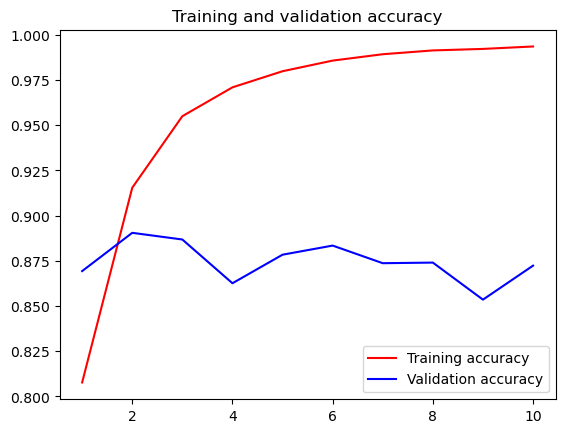

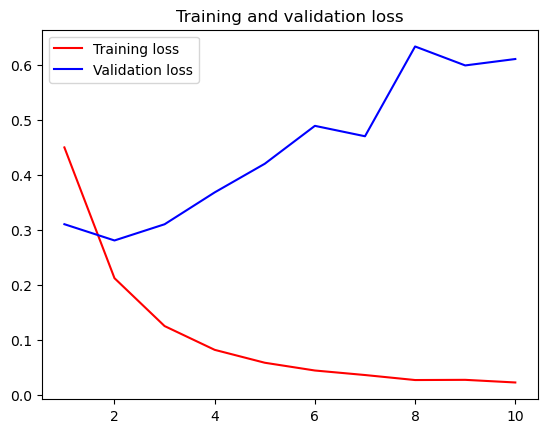

In [37]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# BiLSTM

In [58]:
from keras.layers import Bidirectional

In [59]:
import tensorflow as tf
import tensorflow.keras.layers as layers

model3 = Sequential()
model3.add(Embedding(input_dim=30000, output_dim=20, input_length=20))
model3.add(Bidirectional(LSTM(units=100, dropout=0.2, recurrent_dropout=0.2)))
model3.add(Dense(units=1, activation='sigmoid'))
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

epochs = 10
batch_size = 64

history3 = model3.fit(X1_train, y1_train,validation_data = (X1_test,y1_test), epochs=epochs, batch_size=batch_size)

Epoch 1/10
186/186 [==============================] - 13s 47ms/step - loss: 0.4088 - accuracy: 0.8302 - val_loss: 0.3169 - val_accuracy: 0.8703
Epoch 2/10
186/186 [==============================] - 9s 46ms/step - loss: 0.1816 - accuracy: 0.9311 - val_loss: 0.2791 - val_accuracy: 0.8881
Epoch 3/10
186/186 [==============================] - 9s 46ms/step - loss: 0.0990 - accuracy: 0.9645 - val_loss: 0.3222 - val_accuracy: 0.8878
Epoch 4/10
186/186 [==============================] - 10s 52ms/step - loss: 0.0599 - accuracy: 0.9805 - val_loss: 0.4308 - val_accuracy: 0.8743
Epoch 5/10
186/186 [==============================] - 10s 55ms/step - loss: 0.0473 - accuracy: 0.9849 - val_loss: 0.4006 - val_accuracy: 0.8723
Epoch 6/10
186/186 [==============================] - 10s 56ms/step - loss: 0.0390 - accuracy: 0.9876 - val_loss: 0.4720 - val_accuracy: 0.8723
Epoch 7/10
186/186 [==============================] - 11s 57ms/step - loss: 0.0365 - accuracy: 0.9877 - val_loss: 0.4626 - val_accuracy: 0

In [60]:
y_pred_bi=model3.predict(X1_test)
y_pred_bi=(y_pred_bi > 0.5).astype('int32')

93/93 [==============================] - 1s 6ms/step


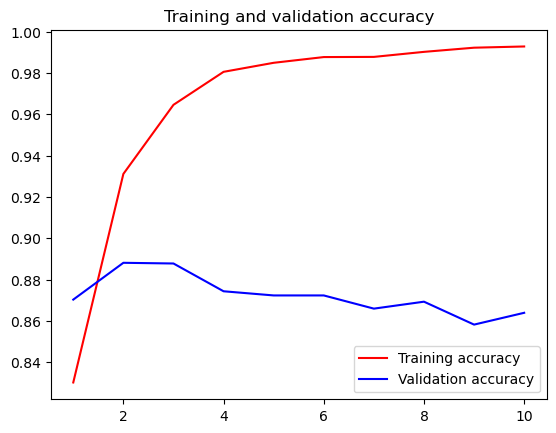

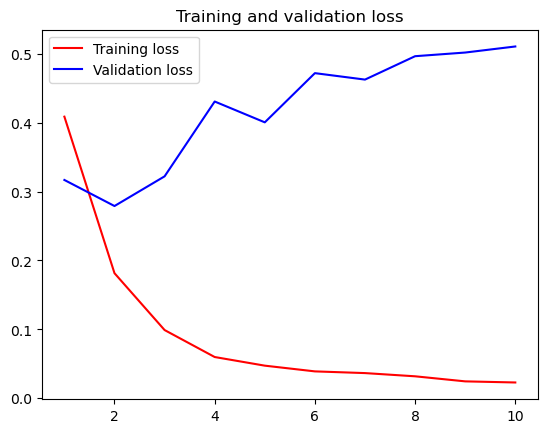

In [128]:
acc2 = history3.history['accuracy']
val_acc2 = history3.history['val_accuracy']
loss2 = history3.history['loss']
val_loss2 = history3.history['val_loss']
epochs = range(1, len(acc2) + 1)
plt.plot(epochs, acc2, 'r', label='Training accuracy')
plt.plot(epochs, val_acc2, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss2, 'r', label='Training loss')
plt.plot(epochs, val_loss2, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [62]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
auc2 = roc_auc_score(y1_test, y_pred_bi)
acc2=accuracy_score(y1_test,y_pred_bi)
precision2 = precision_score(y1_test, y_pred_bi)
recall2 = recall_score(y1_test, y_pred_bi)
f12 = f1_score(y1_test, y_pred_bi)
print("AUC:", auc)

AUC: 0.7991288811627794


In [63]:
print("Accuracy:", acc2)
print("Precision:", precision2)
print("Recall:", recall2)
print("F1 Score:", f12)
print("AUC Score:", auc2)

Accuracy: 0.8639112903225806
Precision: 0.6991150442477876
Recall: 0.7022222222222222
F1 Score: 0.7006651884700664
AUC Score: 0.8067825583079821


# logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression 

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=75)
X1 = tfidf.fit_transform(df['Text']).toarray()
y1 = df['oh_label']

In [47]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X1, y1, test_size = 0.3, stratify=y1, random_state = 42)

In [48]:
logreg = LogisticRegression(solver='liblinear') 
logreg.fit(X2_train,y2_train) 
y_pred=logreg.predict(X2_test) 

In [49]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [50]:
from sklearn.metrics import accuracy_score, r2_score, roc_auc_score
from sklearn.metrics import f1_score
accuracy = accuracy_score(y2_test, y_pred)
r2 = r2_score(y2_test,y_pred)
auc = roc_auc_score(y2_test,y_pred)
print('Accuracy of logistic regression classifier: {:.2f}%'.format(accuracy*100))
print('auc score of logistic regression classifier: {:.2f}'.format(auc))

Accuracy of logistic regression classifier: 84.30%
auc score of logistic regression classifier: 0.69


In [51]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
auc = roc_auc_score(y2_test, y_pred)
acc=accuracy_score(y2_test,y_pred)
precision = precision_score(y2_test, y_pred)
recall = recall_score(y2_test, y_pred)
f1 = f1_score(y2_test, y_pred)
print("AUC:", auc)

AUC: 0.6867756259327096


In [52]:
print("Accuracy:", acc)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC Score:", auc)

Accuracy: 0.8429659498207885
Precision: 0.812
Recall: 0.40078973346495556
F1 Score: 0.5366820885657634
AUC Score: 0.6867756259327096


In [73]:
len(X2_train)

10414

In [74]:
from sklearn import metrics 
cnf_matrix1 = metrics.confusion_matrix(y2_test, y_pred) 
cnf_matrix1 

array([[3357,   94],
       [ 607,  406]], dtype=int64)

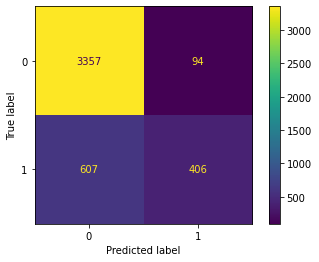

In [75]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score, precision_score, recall_score
cm_display = ConfusionMatrixDisplay(confusion_matrix = cnf_matrix1)
cm_display.plot()
plt.show()

# Neural Networks

In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=75)
X1 = tfidf.fit_transform(df['Text']).toarray()
y1 = df['oh_label']

In [65]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X1, y1, test_size = 0.2, stratify=y1, random_state = 42)

In [66]:
from keras.utils.np_utils import to_categorical
y3_train=to_categorical(y1_train, num_classes = 2, dtype='float32')
y3_test=to_categorical(y1_test, num_classes = 2, dtype='float32')

In [67]:
import tensorflow as tf
import tensorflow.keras.layers as layers
model2 = tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(2,activation='sigmoid')
])


model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history2=model2.fit(X3_train, y3_train, epochs=10, validation_data=(X3_test, y3_test))

Epoch 1/10
372/372 [==============================] - 3s 5ms/step - loss: 0.4206 - accuracy: 0.8348 - val_loss: 0.4049 - val_accuracy: 0.8448
Epoch 2/10
372/372 [==============================] - 2s 4ms/step - loss: 0.3796 - accuracy: 0.8545 - val_loss: 0.3986 - val_accuracy: 0.8471
Epoch 3/10
372/372 [==============================] - 2s 4ms/step - loss: 0.3684 - accuracy: 0.8604 - val_loss: 0.3976 - val_accuracy: 0.8454
Epoch 4/10
372/372 [==============================] - 2s 4ms/step - loss: 0.3630 - accuracy: 0.8604 - val_loss: 0.3958 - val_accuracy: 0.8474
Epoch 5/10
372/372 [==============================] - 2s 4ms/step - loss: 0.3520 - accuracy: 0.8670 - val_loss: 0.4146 - val_accuracy: 0.8454
Epoch 6/10
372/372 [==============================] - 2s 4ms/step - loss: 0.3449 - accuracy: 0.8693 - val_loss: 0.4036 - val_accuracy: 0.8488
Epoch 7/10
372/372 [==============================] - 2s 4ms/step - loss: 0.3385 - accuracy: 0.8723 - val_loss: 0.4255 - val_accuracy: 0.8370
Epoch 

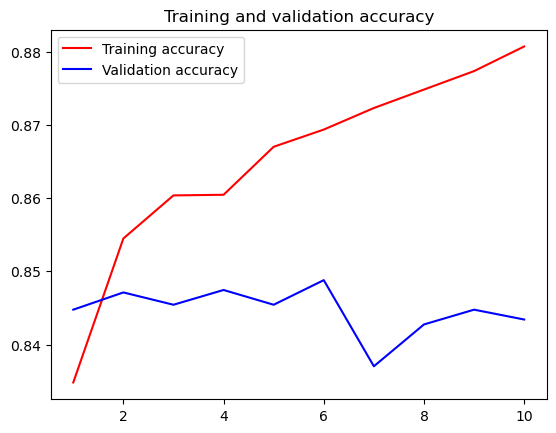

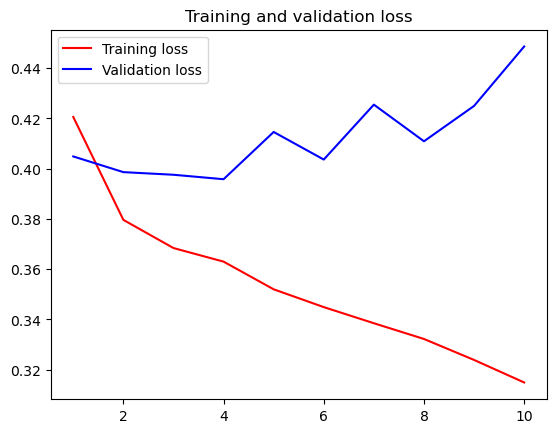

93/93 [==============================] - 0s 2ms/step - loss: 0.4486 - accuracy: 0.8434
Accuracy: 84.34%
93/93 [==============================] - 0s 2ms/step
AUC score: 0.71


In [79]:
acc1 = history2.history['accuracy']
val_acc1 = history2.history['val_accuracy']
loss1 = history2.history['loss']
val_loss1 = history2.history['val_loss']
epochs = range(1, len(acc1) + 1)
plt.plot(epochs, acc1, 'r', label='Training accuracy')
plt.plot(epochs, val_acc1, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss1, 'r', label='Training loss')
plt.plot(epochs, val_loss1, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

loss, accuracy = model2.evaluate(X3_test, y3_test)
print('Accuracy: {:.2f}%'.format(accuracy*100))

y_pred_prob = model2.predict(X3_test)


y_pred_prob = (y_pred_prob > 0.5).astype('int32')

auc_score = roc_auc_score(y3_test, y_pred_prob)
print('AUC score: {:.2f}'.format(auc_score))


In [77]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
auc3 = roc_auc_score(y3_test, y_pred_prob)
acc3=accuracy_score(y3_test,y_pred_prob)
precision3 = precision_score(y3_test, y_pred_prob,average='micro')
recall3 = recall_score(y3_test, y_pred_prob,average='micro')
f13 = f1_score(y3_test, y_pred_prob,average='micro')
print("AUC:", auc3)

AUC: 0.7061123183157081


In [78]:
print("Accuracy:", acc3)
print("Precision:", precision3)
print("Recall:", recall3)
print("F1 Score:", f13)
print("AUC Score:", auc3)

Accuracy: 0.8434139784946236
Precision: 0.8434139784946236
Recall: 0.8434139784946236
F1 Score: 0.8434139784946236
AUC Score: 0.7061123183157081


# Decision Tree Classifier

In [81]:
from sklearn.tree import DecisionTreeClassifier

In [83]:
clf = DecisionTreeClassifier(max_depth =4, random_state = 42)
clf.fit(X2_train, y2_train)
pred_decision_tree = clf.predict(X2_test)

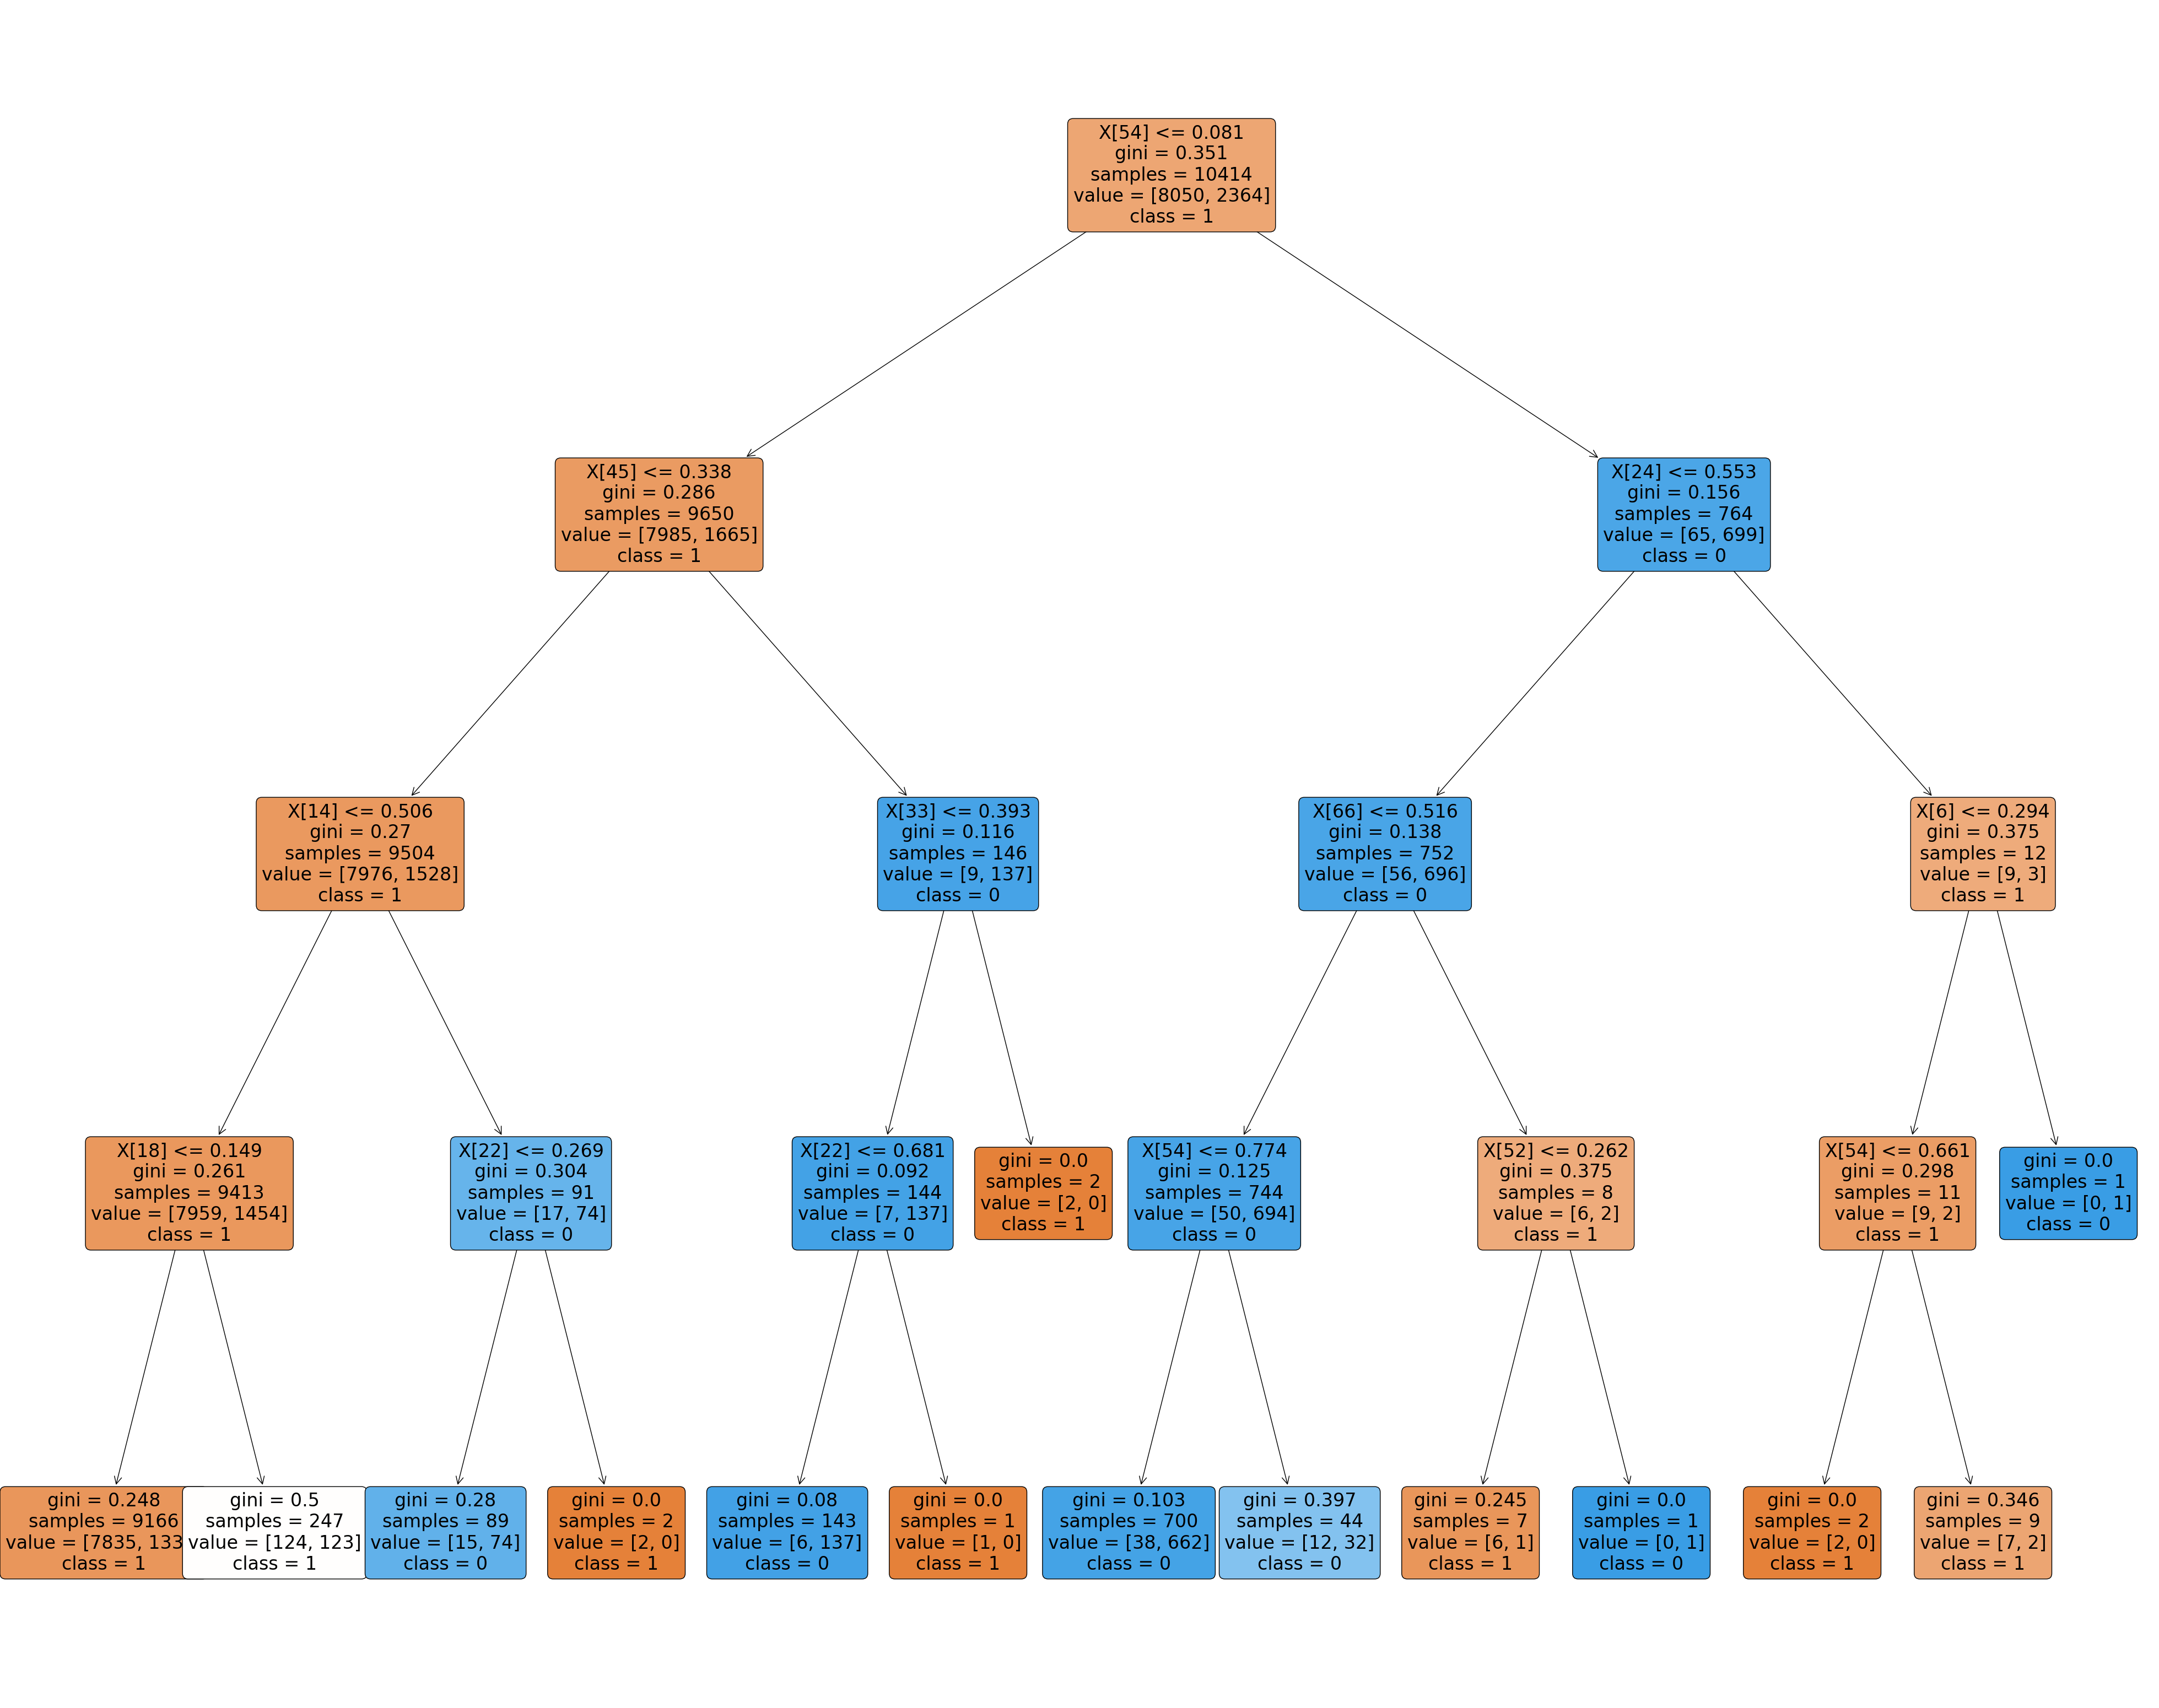

In [84]:
from sklearn import tree
import matplotlib.pyplot as plt
labels=y1.unique().astype(str).tolist()
plt.figure(figsize=(50,40))

a = tree.plot_tree(clf,
                   
                   class_names=labels,

                   rounded = True,

                   filled = True,

                   fontsize=24)

plt.show()

In [85]:
cnf_matrix2 = confusion_matrix(y2_test, pred_decision_tree )
print(cnf_matrix2)

[[3412   39]
 [ 681  332]]


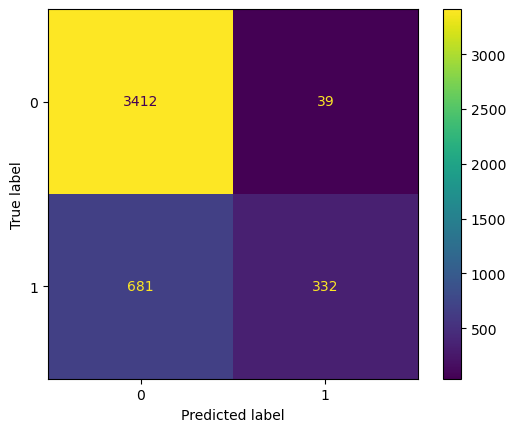

In [87]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay(confusion_matrix = cnf_matrix2)
cm_display.plot()
plt.show()

In [98]:
from sklearn.metrics import accuracy_score, roc_auc_score
accuracy4 = accuracy_score(y2_test, pred_decision_tree)
auc4 = roc_auc_score(y2_test, pred_decision_tree)
print('Accuracy of decision tree classifier: {:.2f}%'.format(accuracy4*100))
print('AUC score of decision tree classifier: {:.2f}%'.format(auc4))

Accuracy of decision tree classifier: 83.87%
AUC score of decision tree classifier: 0.66%


In [89]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
auc4 = roc_auc_score(y2_test, pred_decision_tree)
acc34=accuracy_score(y2_test, pred_decision_tree)
precision4 = precision_score(y2_test, pred_decision_tree)
recall4 = recall_score(y2_test, pred_decision_tree)
f14 = f1_score(y2_test, pred_decision_tree)
print("AUC:", auc4)

AUC: 0.6582191579017828


In [90]:
print("Accuracy:", accuracy4)
print("Precision:", precision4)
print("Recall:", recall4)
print("F1 Score:", f14)
print("AUC Score:", auc4)

Accuracy: 0.8387096774193549
Precision: 0.894878706199461
Recall: 0.32773938795656465
F1 Score: 0.4797687861271676
AUC Score: 0.6582191579017828


# Random Forest Classifier

In [91]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

classifier_rf.fit(X2_train, y2_train)
classifier_rf.oob_score_

0.8350297676205108

In [92]:
Y_pred = classifier_rf.predict(X2_test)

In [93]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
print('Random Forest Classifier:')
from sklearn.metrics import accuracy_score, f1_score
print('Accuracy score:', round(accuracy_score(y2_test, Y_pred) * 100, 2))
print('F1 score:', round(f1_score(y2_test, Y_pred, average='weighted') * 100, 2))

Random Forest Classifier:
Accuracy score: 83.04
F1 score: 79.05


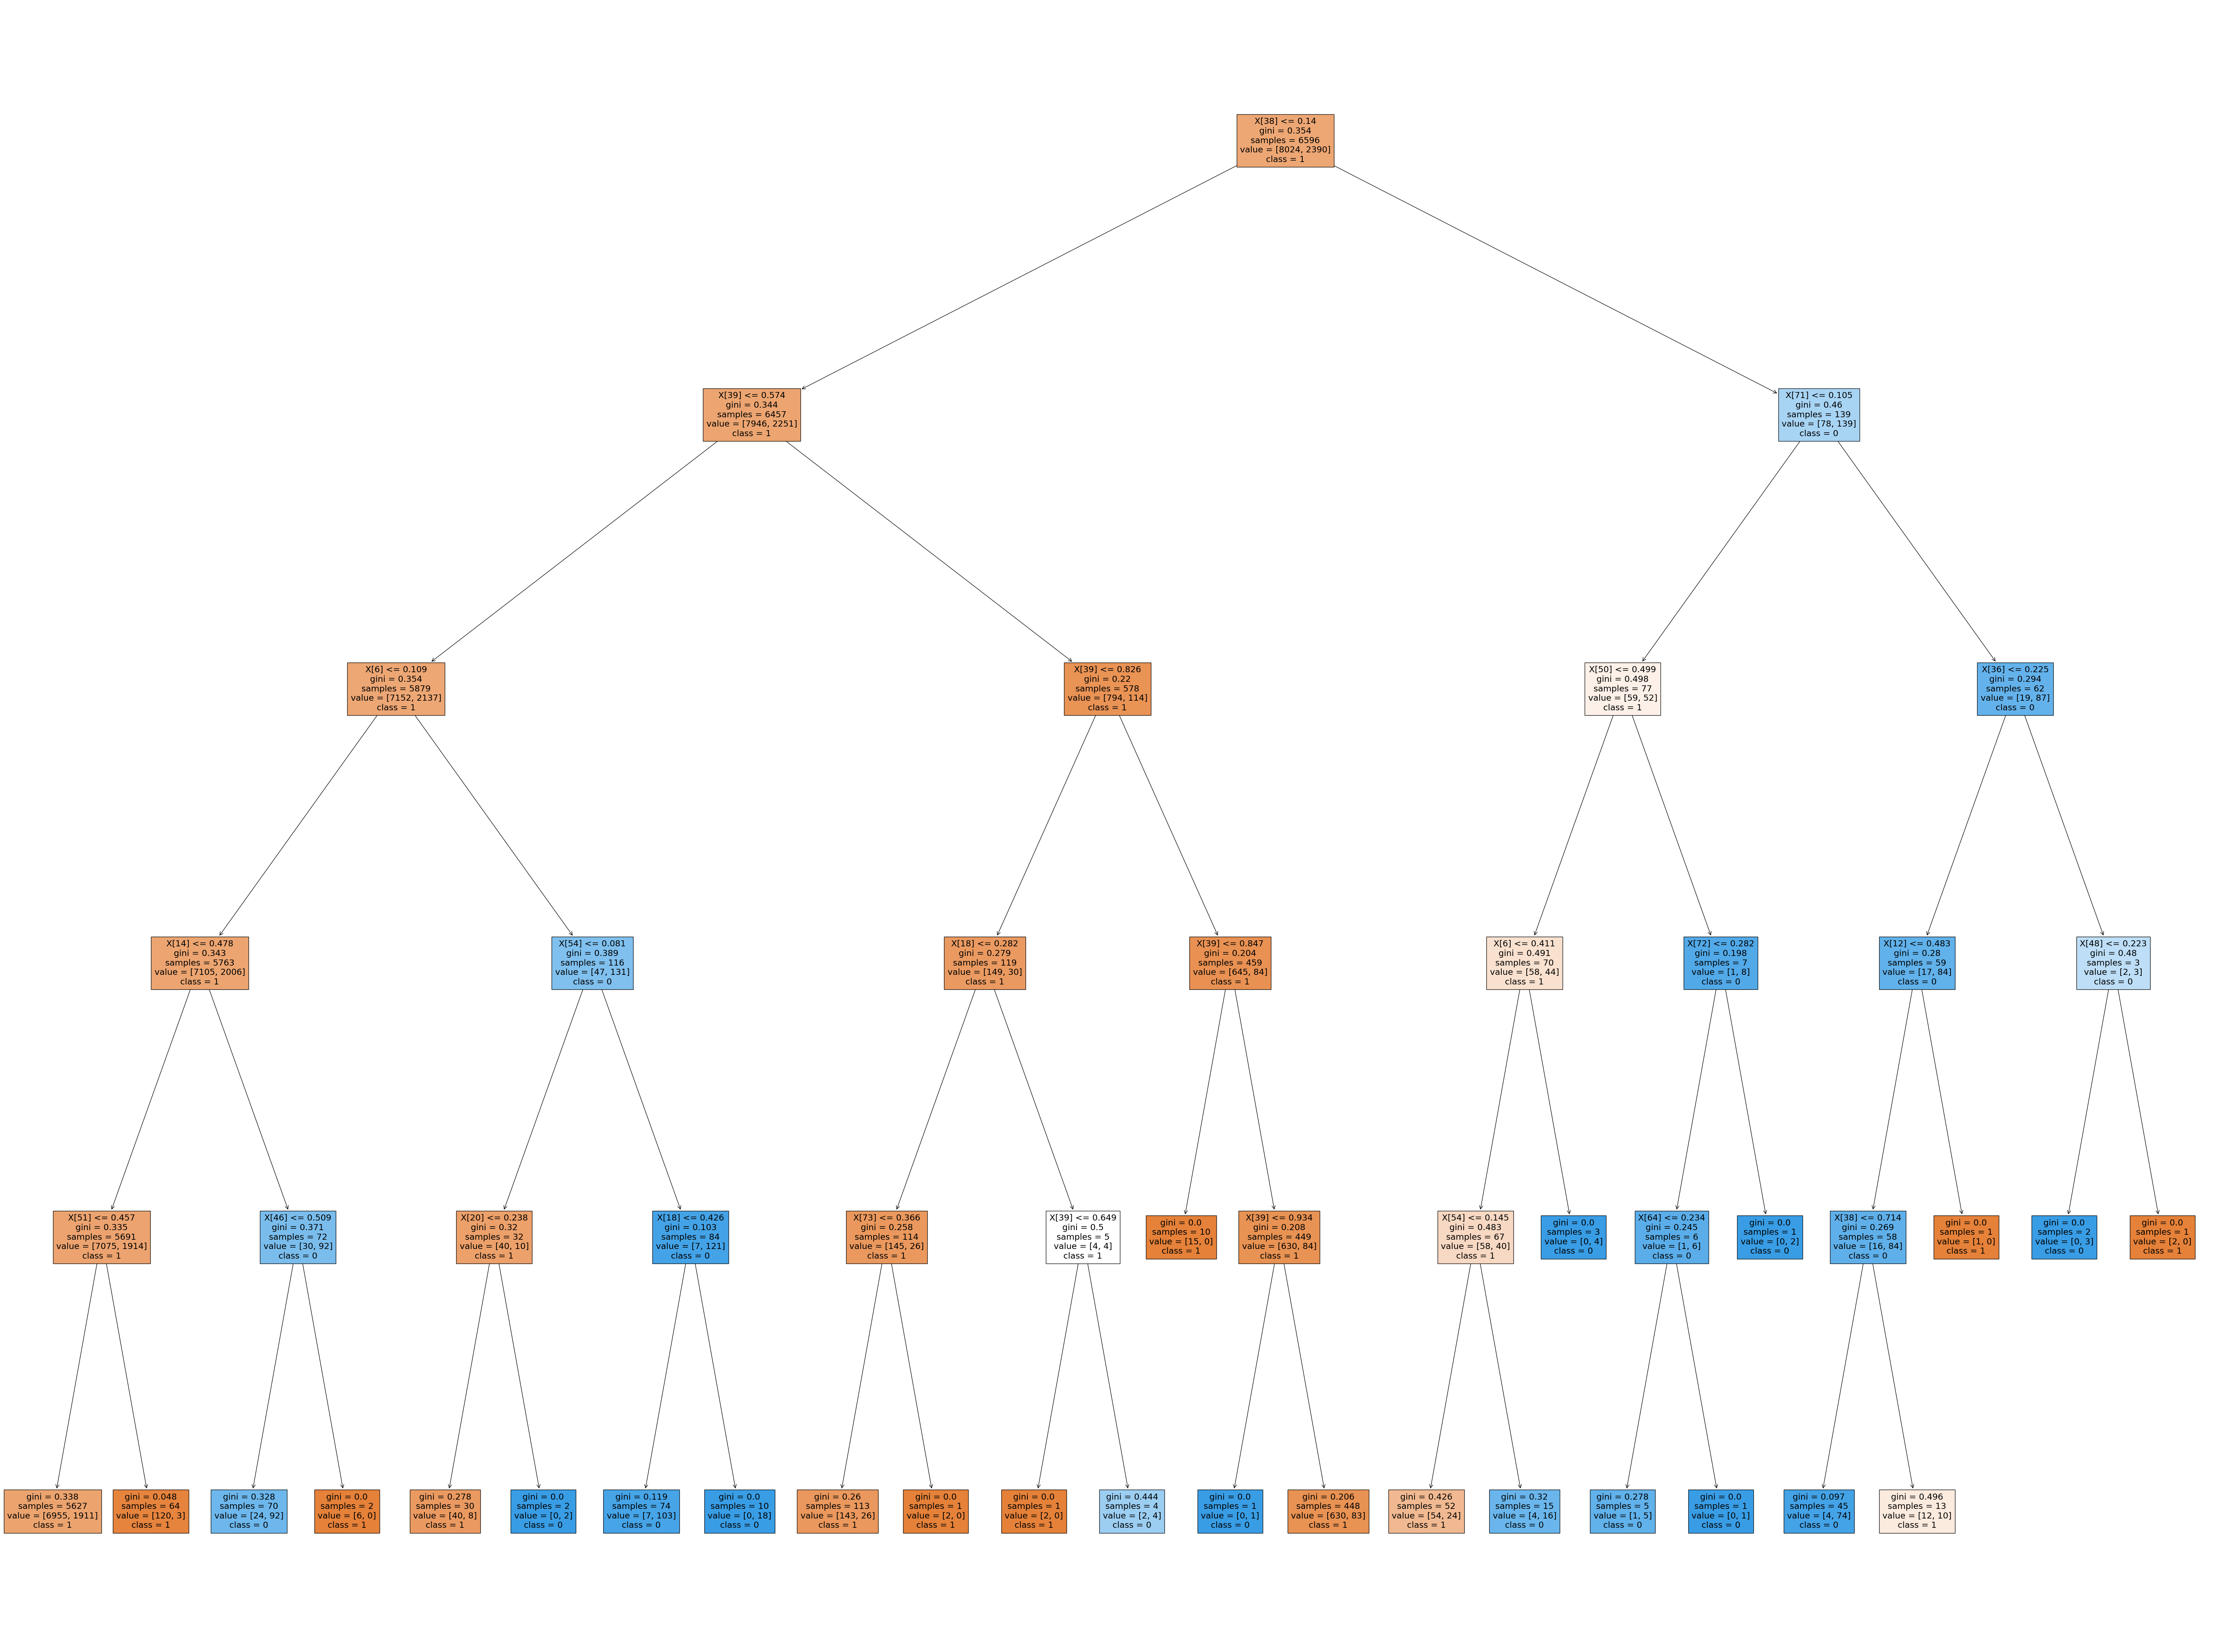

In [94]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(80,60))
plot_tree(classifier_rf.estimators_[5],class_names=labels,filled=True);

In [99]:
from sklearn.metrics import accuracy_score, roc_auc_score
accuracy5 = accuracy_score(y2_test, Y_pred)
auc5 = roc_auc_score(y2_test,Y_pred)
print('Accuracy: {:.2f}%'.format(accuracy5*100))
print('AUC: {:.2f}%'.format(auc5))

Accuracy: 83.04%
AUC: 0.63%


In [96]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
auc5 = roc_auc_score(y2_test, Y_pred)
acc5=accuracy_score(y2_test, Y_pred)
precision5 = precision_score(y2_test,Y_pred)
recall5 = recall_score(y2_test,Y_pred)
f15 = f1_score(y2_test, Y_pred)
print("AUC:", auc5)

AUC: 0.6305417288949824


In [97]:
print("Accuracy:", accuracy5)
print("Precision:", precision5)
print("Recall:", recall5)
print("F1 Score:", f15)
print("AUC Score:", auc5)

Accuracy: 0.830421146953405
Precision: 0.9571428571428572
Recall: 0.26456071076011844
F1 Score: 0.41453982985305493
AUC Score: 0.6305417288949824


# AdaBoost Classifier

In [100]:
from sklearn.ensemble import AdaBoostClassifier

In [101]:
clf2 = AdaBoostClassifier(n_estimators=100)
clf2 = clf2.fit(X2_train, y2_train)
y_pred_ada = clf.predict(X2_test)
accuracy6 = accuracy_score(y2_test, y_pred)
auc6 = roc_auc_score(y2_test, y_pred)
print("accuracy is: ",accuracy)
print("AUC:",auc)

accuracy is:  0.8434139490127563
AUC: 0.7991288811627794


In [102]:
from sklearn import metrics 
cnf_matrix3 = metrics.confusion_matrix(y2_test, y_pred_ada) 
cnf_matrix3

array([[3412,   39],
       [ 681,  332]], dtype=int64)

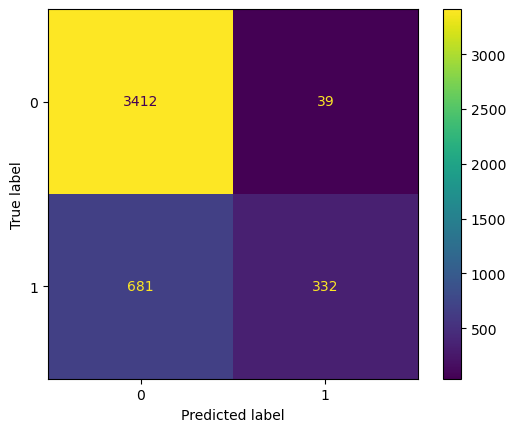

In [103]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = cnf_matrix3)
cm_display.plot()
plt.show()

In [104]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
auc6 = roc_auc_score(y2_test, y_pred_ada)
acc6=accuracy_score(y2_test,  y_pred_ada)
precision6 = precision_score(y2_test, y_pred_ada)
recall6 = recall_score(y2_test, y_pred_ada)
f16 = f1_score(y2_test, y_pred_ada)
print("AUC:", auc6)

AUC: 0.6582191579017828


In [105]:
print("Accuracy:", accuracy6)
print("Precision:", precision6)
print("Recall:", recall6)
print("F1 Score:", f16)
print("AUC Score:", auc6)

Accuracy: 0.8429659498207885
Precision: 0.894878706199461
Recall: 0.32773938795656465
F1 Score: 0.4797687861271676
AUC Score: 0.6582191579017828


# XGBoost Classfier

In [107]:
import xgboost as xgb
data_dmatrix = xgb.DMatrix(data=X2_train,label=y2_train,enable_categorical=True)

In [108]:
from xgboost import XGBClassifier
params = {
            'objective':'multi:softmax',
            'max_depth': 4,
            'num_class': 2,
            'alpha': 10,
            'learning_rate': 0.01,
            'n_estimators':100
        }
            

xgb_clf = XGBClassifier(**params)

xgb_clf.fit(X2_train, y2_train)

XGBClassifier(alpha=10, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_class=2,
              num_parallel_tree=None, ...)

In [110]:
y_pred_xg = xgb_clf.predict(X2_test)
from sklearn.metrics import accuracy_score
auc7 = roc_auc_score(y2_test,y_pred_xg)
print('XGBoost model accuracy score: {0:0.4f}'. format(accuracy_score(y2_test, y_pred_xg)))
print("AUC:",auc7)

XGBoost model accuracy score: 0.8389
AUC: 0.65871274131738


In [111]:
from xgboost import cv

params = {'objective':'multi:softmax','colsample_bytree': 0.3,'learning_rate': 0.01, 'num_class': 2,
                'max_depth': 4, 'alpha': 10}

xgb_cv = cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50, early_stopping_rounds=10, metrics="auc", as_pandas=True, seed=123)

In [112]:
xgb_cv.head()

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.682334,0.000836,0.672159,0.003673
1,0.731066,0.007323,0.722489,0.002526
2,0.740400,0.016475,0.727247,0.010889
3,0.744563,0.020857,0.726781,0.009240
4,0.760242,0.011166,0.743131,0.001628


In [113]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
auc7 = roc_auc_score(y2_test, y_pred_xg)
acc7=accuracy_score(y2_test,  y_pred_xg)
precision7 = precision_score(y2_test, y_pred_xg)
recall7 = recall_score(y2_test, y_pred_xg)
f17 = f1_score(y2_test, y_pred_xg)
print("AUC:", auc7)

AUC: 0.65871274131738


In [115]:
print("Accuracy:", acc7)
print("Precision:", precision7)
print("Recall:", recall7)
print("F1 Score:", f17)
print("AUC Score:", auc7)

Accuracy: 0.8389336917562724
Precision: 0.8951612903225806
Recall: 0.32872655478775914
F1 Score: 0.48086642599277973
AUC Score: 0.65871274131738


# KNN Classifier

In [116]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

classifier = KNeighborsClassifier(n_neighbors=2)
classifier.fit(X2_train, y2_train)

y_pred_knn = classifier.predict(X2_test)

C:\Users\sushm\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [117]:
cnf = confusion_matrix(y2_test, y_pred_knn)
cnf

array([[3331,  120],
       [ 688,  325]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

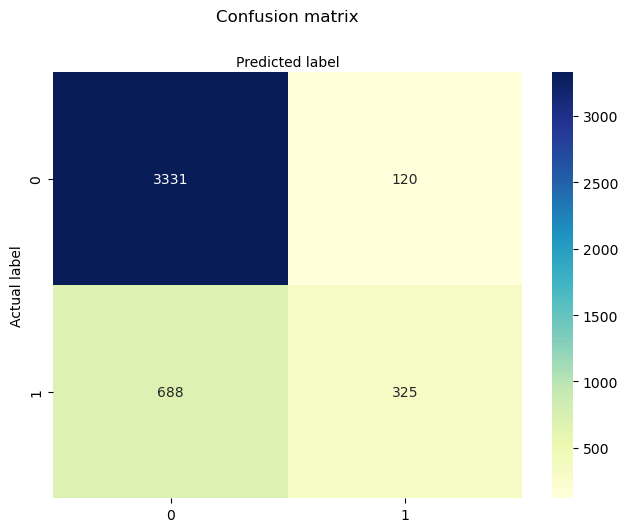

In [118]:
import seaborn as sns
fig, ax2 = plt.subplots(sharex = True)
sns.heatmap(pd.DataFrame(cnf), annot=True, cmap="YlGnBu" ,fmt='g') 
ax2.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Confusion matrix', y=1.1) 
plt.ylabel('Actual label') 
plt.xlabel('Predicted label')

In [119]:
print("Accuracy:",metrics.accuracy_score(y2_test, y_pred_knn)) 
print("AUC:",roc_auc_score(y2_test,y_pred_knn))

Accuracy: 0.8189964157706093
AUC: 0.6430283452183339


In [120]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
auc8 = roc_auc_score(y2_test,y_pred_knn)
acc8=accuracy_score(y2_test,y_pred_knn)
precision8 = precision_score(y2_test,y_pred_knn)
recall8 = recall_score(y2_test,y_pred_knn)
f18 = f1_score(y2_test,y_pred_knn)
print("AUC:", auc8)

AUC: 0.6430283452183339


In [121]:
print("Accuracy:", acc8)
print("Precision:", precision8)
print("Recall:", recall8)
print("F1 Score:", f18)
print("AUC Score:", auc8)

Accuracy: 0.8189964157706093
Precision: 0.7303370786516854
Recall: 0.32082922013820336
F1 Score: 0.44581618655692734
AUC Score: 0.6430283452183339


# Gaussian Nb

In [122]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

In [123]:
classifier = GaussianNB();
classifier.fit(X2_train, y2_train)

GaussianNB()

In [124]:
y_pred_gnb = classifier.predict(X2_test)
cm = confusion_matrix(y2_test, y_pred_gnb)
cm

array([[ 793, 2658],
       [  72,  941]], dtype=int64)

In [125]:
print("Accuracy:",metrics.accuracy_score(y2_test, y_pred_gnb)) 
print("AUC:",roc_auc_score(y2_test,y_pred_gnb))

Accuracy: 0.38844086021505375
AUC: 0.5793562276324902


In [126]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
auc9 = roc_auc_score(y2_test,y_pred_gnb)
acc9=accuracy_score(y2_test,y_pred_gnb)
precision9 = precision_score(y2_test,y_pred_gnb)
recall9 = recall_score(y2_test,y_pred_gnb)
f19 = f1_score(y2_test,y_pred_gnb)
print("AUC:", auc9)

AUC: 0.5793562276324902


In [127]:
print("Accuracy:", acc9)
print("Precision:", precision9)
print("Recall:", recall9)
print("F1 Score:", f19)
print("AUC Score:", auc9)

Accuracy: 0.38844086021505375
Precision: 0.26146151708808
Recall: 0.928923988153998
F1 Score: 0.40806591500433653
AUC Score: 0.5793562276324902
